In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from IPython import get_ipython
import warnings
warnings.filterwarnings("ignore")

In [4]:
df=pd.read_csv("music_train.csv")

In [5]:
df.head(5)

,lyric,class
0,Can't drink without thinkin' about you,1
1,Now Lil Pump flyin' private jet (Yuh),0
2,"No, matter fact, you ain't help me when I had ...",0
3,"And you could find me, I ain't hidin'",0
4,From the way you talk to the way you move,1


In [6]:
df.columns

Index(['lyric', 'class'], dtype='object')

In [7]:
df.info

<bound method DataFrame.info of                                                    lyric  class
0                 Can't drink without thinkin' about you      1
1                  Now Lil Pump flyin' private jet (Yuh)      0
2      No, matter fact, you ain't help me when I had ...      0
3                  And you could find me, I ain't hidin'      0
4              From the way you talk to the way you move      1
...                                                  ...    ...
51049  I told her pour me some more, then she went ri...      0
51050            Hit the ground and crawl to the dresser      0
51051  Just keep breathin' and breathin' and breathin...      1
51052      Down go the system, long live the king (King)      0
51053  If your mother knew all the things we do (From...      1

[51054 rows x 2 columns]>

In [8]:
df.isnull().sum()

lyric    0
class    0
dtype: int64

In [9]:
df.tail()

,lyric,class
51049,"I told her pour me some more, then she went ri...",0
51050,Hit the ground and crawl to the dresser,0
51051,Just keep breathin' and breathin' and breathin...,1
51052,"Down go the system, long live the king (King)",0
51053,If your mother knew all the things we do (From...,1


In [10]:
df.describe()

,class
count,51054.000000
mean,0.434227
std,0.495660
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


In [11]:
df.shape

(51054, 2)

In [12]:
df['class'].unique()

array([1, 0])

In [13]:
df['class'].value_counts()

0    28885
1    22169
Name: class, dtype: int64

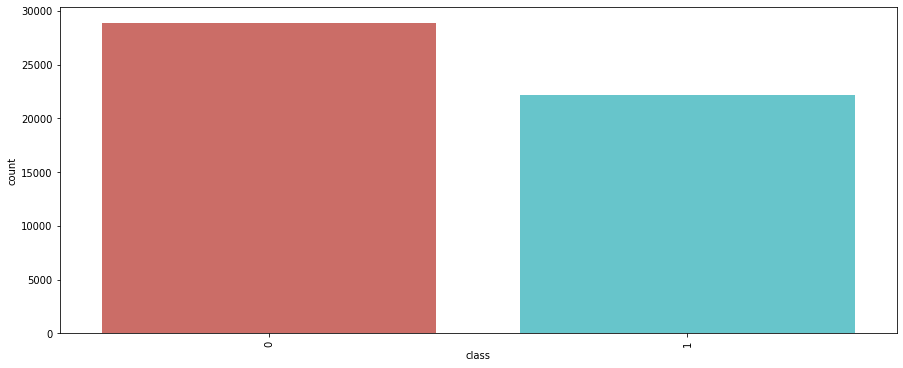

In [14]:
plt.figure(figsize=(15,6))
sns.countplot('class', data = df, palette='hls')
plt.xticks(rotation = 90)
plt.show()

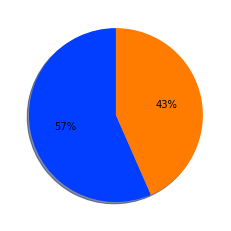

In [15]:
colors = sns.color_palette('bright')
plt.pie(df['class'].value_counts(),
colors = colors,
autopct = '%0.0f%%', shadow = 'True',
startangle = 90)
plt.show()


In [16]:
df2=df.copy()

In [17]:
df2['total_length_characters'] = df2['lyric'].str.len()
print(df2['total_length_characters'])
total_length_characters = df2['total_length_characters'].sum()
print(total_length_characters)
count = 0
for y in df2["lyric"]:
    count = count + 1
print(count)
average_length = total_length_characters / count
print (average_length)


0        38
1        37
2        54
3        37
4        41
         ..
51049    73
51050    39
51051    61
51052    45
51053    55
Name: total_length_characters, Length: 51054, dtype: int64
2032812
51054
39.81689975320249


In [18]:
df2['total_count_words'] = df2['lyric'].str.split().str.len()
print(df2['total_count_words'])
total_words = df2['total_count_words'].sum()
print(total_words)
count = 0
for y in df2["lyric"]:
    count = count + 1
print(count)
average_words = total_words / count
print (average_words)


0         6
1         7
2        12
3         8
4        10
         ..
51049    16
51050     8
51051     9
51052     9
51053    12
Name: total_count_words, Length: 51054, dtype: int64
418280
51054
8.19289379872292


In [19]:
import string
import re
import nltk
from nltk.util import pr
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from nltk.corpus import stopwords
stemmer = nltk.SnowballStemmer("english")
nltk.download('stopwords')
stopword=set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [20]:
def clean(text):
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation),
    '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = [word for word in text.split(' ') if word not in stopword]
    text=" ".join(text)
    text = [stemmer.stem(word) for word in text.split(' ')]
    text=" ".join(text)
    return text
df2["lyric"] = df2["lyric"].apply(clean)

In [21]:
df2['total_length_characters'] = df2['lyric'].str.len()
print(df2['total_length_characters'])
total_length_characters = df2['total_length_characters'].sum()
print(total_length_characters)
count = 0
for y in df2["lyric"]:
    count = count + 1
print(count)
average_length = total_length_characters / count
print (average_length)

0        26
1        29
2        27
3        21
4        17
         ..
51049    30
51050    24
51051    40
51052    29
51053    20
Name: total_length_characters, Length: 51054, dtype: int64
1155941
51054
22.64153641242606


In [22]:
df2['total_count_words'] = df2['lyric'].str.split().str.len()
print(df2['total_count_words'])
total_words = df2['total_count_words'].sum()
print(total_words)
count = 0
for y in df2["lyric"]:
    count = count + 1
print(count)
average_words = total_words / count
print (average_words)

0        4
1        6
2        5
3        4
4        4
        ..
51049    6
51050    4
51051    5
51052    6
51053    4
Name: total_count_words, Length: 51054, dtype: int64
229901
51054
4.5030947624084305


In [23]:
x = np.array(df2["lyric"])
y = np.array(df2["class"])

In [24]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(x)
vectorizer.get_feature_names_out()
print(X.shape)

(51054, 11136)


In [25]:
first_vector = X[0]
dataframe = pd.DataFrame(first_vector.T.todense(),
index = vectorizer.get_feature_names(),
columns = ["tfidf"])
dataframe.sort_values(by = ["tfidf"],ascending=False)

,tfidf
thinkin,0.549645
drink,0.539251
without,0.520521
cant,0.368994
aa,0.000000
...,...
fragil,0.000000
fragranc,0.000000
frame,0.000000
franc,0.000000


In [26]:
from sklearn.cluster import KMeans

In [29]:
wcss = []
for i in range(1,11):
  km = KMeans(n_clusters=i)
  km.fit_predict(X)
  wcss.append(km.inertia_)

In [30]:
print(km.cluster_centers_)


[[8.32949851e-06 1.71349657e-05 2.23652022e-05 ... 1.15610999e-05
  1.10205424e-05 1.87244284e-05]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 ...
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]]


In [31]:
wcss

[50509.854628753834,
 50130.61663373843,
 49722.67653543665,
 49356.99339948883,
 49248.13289522941,
 48916.11400301749,
 48874.232592511675,
 48680.16886288056,
 48451.740582835664,
 48254.15776224645]

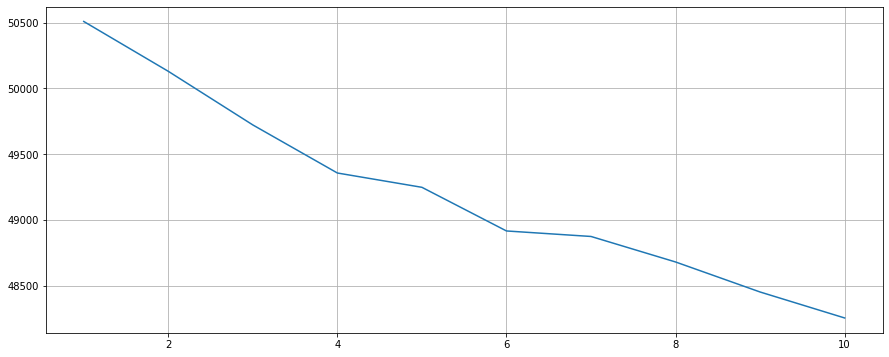

In [32]:
plt.figure(figsize=(15,6))
plt.plot(range(1,11),wcss)
plt.grid()
plt.xticks(rotation = 0)
plt.show()

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X,
y,
test_size=0.33,
random_state=42)


In [34]:
clf = DecisionTreeClassifier()
clf.fit(X_train,y_train)

DecisionTreeClassifier()

In [35]:
y_pred = clf.predict(X_test)

In [43]:
print("Training Accuracy :", clf.score(X_train, y_train))
print("Testing Accuracy :", clf.score(X_test, y_test))


Training Accuracy : 0.9926036367888674
Testing Accuracy : 0.8084639126305793


In [36]:
from sklearn import metrics
from sklearn.metrics import accuracy_score

In [37]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [38]:
matrix = confusion_matrix(y_test,y_pred)
print('Confusion matrix : \n',matrix)

Confusion matrix : 
 [[7902 1631]
 [1596 5719]]


In [39]:
from sklearn.linear_model import LogisticRegression

In [40]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [41]:
y_pred = model.predict(X_test)


In [42]:
print("Training Accuracy :", model.score(X_train, y_train))
print("Testing Accuracy :", model.score(X_test, y_test))

Training Accuracy : 0.809477869379641
Testing Accuracy : 0.7647792022792023


In [44]:
matrix = confusion_matrix(y_test,y_pred)
print('Confusion matrix : \n',matrix)

Confusion matrix : 
 [[7781 1752]
 [2211 5104]]


In [45]:
from sklearn.svm import LinearSVC

In [46]:
LSVCClf = LinearSVC(dual = False, random_state = 0,
penalty = 'l1',tol = 1e-5)
LSVCClf.fit(X_train, y_train)

LinearSVC(dual=False, penalty='l1', random_state=0, tol=1e-05)

In [47]:
y_pred = LSVCClf.predict(X_test)

In [50]:
print("Training Accuracy :", LSVCClf.score(X_train, y_train))
print("Testing Accuracy :", LSVCClf.score(X_test, y_test))

Training Accuracy : 0.8418113781207975
Testing Accuracy : 0.7680436847103513


In [48]:
matrix = confusion_matrix(y_test,y_pred)
print('Confusion matrix : \n',matrix)

Confusion matrix : 
 [[7330 2203]
 [1705 5610]]


In [49]:
from sklearn.ensemble import GradientBoostingClassifier

In [51]:
GB=GradientBoostingClassifier(n_estimators=2)
GB.fit(X_train, y_train)


GradientBoostingClassifier(n_estimators=2)

In [53]:
y_pred = GB.predict(X_test)

In [54]:
print("Training Accuracy :", GB.score(X_train, y_train))
print("Testing Accuracy :", GB.score(X_test, y_test))

Training Accuracy : 0.5660995147050225
Testing Accuracy : 0.5661206077872745


In [55]:
matrix = confusion_matrix(y_test,y_pred)
print('Confusion matrix : \n',matrix)

Confusion matrix : 
 [[9533    0]
 [7310    5]]


In [56]:
from sklearn.ensemble import RandomForestClassifier

In [57]:
rf_classifier= RandomForestClassifier(n_estimators= 10,
criterion="entropy")
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10)

In [58]:
y_pred = rf_classifier.predict(X_test)

In [59]:
print("Training Accuracy :", rf_classifier.score(X_train, y_train))
print("Testing Accuracy :", rf_classifier.score(X_test, y_test))

Training Accuracy : 0.9817283517511548
Testing Accuracy : 0.8363603988603988


In [60]:
matrix = confusion_matrix(y_test,y_pred)
print('Confusion matrix : \n',matrix)


Confusion matrix : 
 [[8496 1037]
 [1720 5595]]
